In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import datetime
import random
import math

In [2]:
current_date_time = datetime.datetime.now()
formatted_date = current_date_time.strftime("%Y-%m-%d")

In [3]:
#Ações : TSLA, AAPL, GOOG, NVDA, INTC  
acao = 'TSLA'
df = yf.download(acao, start='1990-01-01', end=formatted_date)

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'TSLA'}, xlabel='Date'>

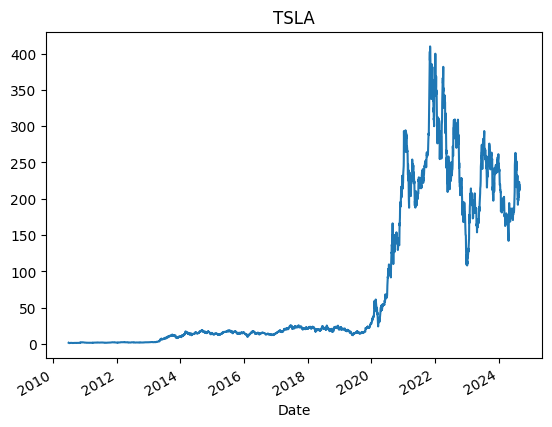

In [4]:
#Plotar o Gráfico
df['Close'].plot(title=acao)

In [5]:
data = df.filter(['Close'])
dataset = data.values

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.51259019],
       [0.53621359],
       [0.51882618]])

In [7]:
training_data_len = math.ceil(len(scaled_data) * 0.8)

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

# Criar conjuntos de dados para treinamento
train_X = []
train_Y = []

for i in range(60, len(train_data)):
    train_X.append(train_data[i-60:i, 0])
    train_Y.append(train_data[i, 0])

# Converter para arrays numpy e redimensionar
train_X = np.array(train_X)
train_Y = np.array(train_Y)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

c:\Users\Inteli\OneDrive\Documentos\GitHub\Ponderada9pts\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [11]:
model.fit(train_X, train_Y, batch_size=1, epochs=3)

Epoch 1/3
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - loss: 0.0013
Epoch 2/3
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - loss: 2.6398e-04
Epoch 3/3
2792/2792 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - loss: 1.9367e-04


In [12]:
test_X = []
test_Y = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    test_X.append(test_data[i-60:i, 0])

test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [13]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


C:\Users\Inteli\AppData\Local\Temp\ipykernel_12484\2702926454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


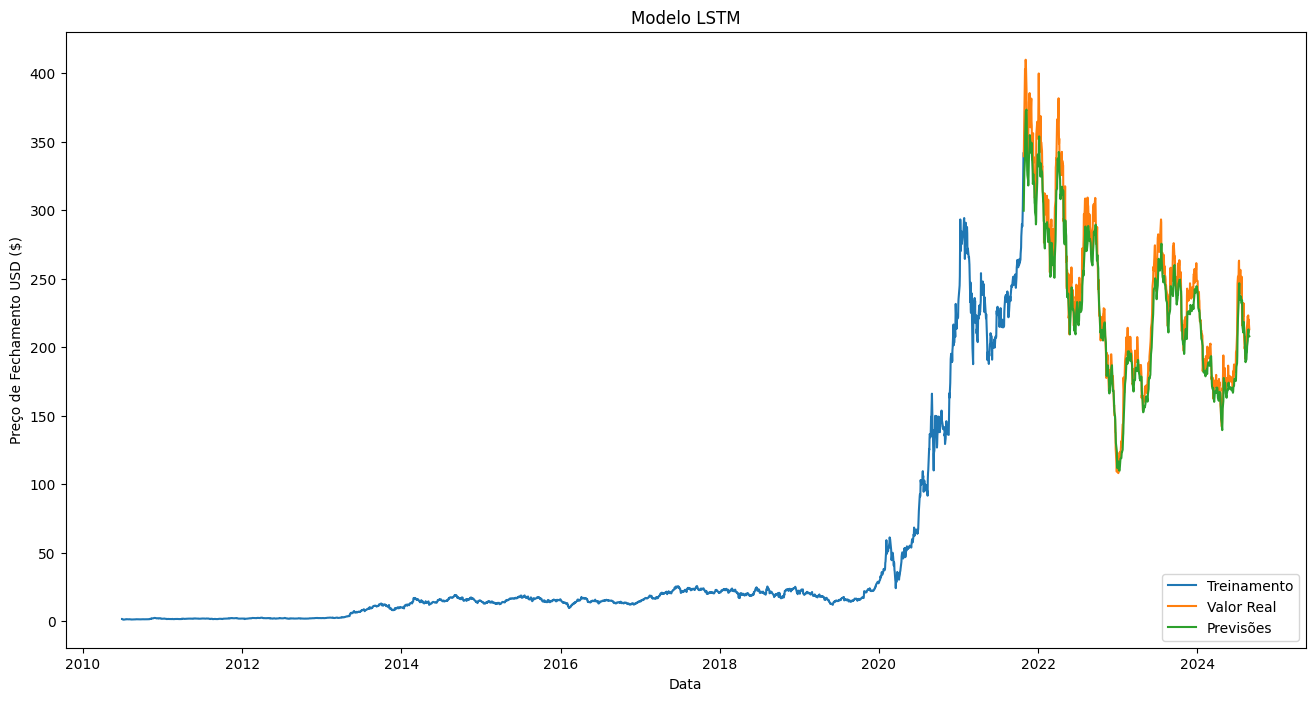

In [14]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Modelo LSTM')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Treinamento', 'Valor Real', 'Previsões'], loc='lower right')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcular o MSE (Mean Squared Error)
mse = mean_squared_error(test_Y, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular o MAE (Mean Absolute Error)
mae = mean_absolute_error(test_Y, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 272.60661080517195
Mean Absolute Error (MAE): 13.00337907169642
Root Mean Squared Error (RMSE): 16.510802851623296
